In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns

In [2]:
pip install statsmodels

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 5.1 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation 

In [3]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [5]:
heights = pd.read_csv('/Users/christinasimbenga/Desktop/heights.csv')

In [6]:
heights.head

<bound method NDFrame.head of     AM_Height  PM_Height
0     1728.75    1720.25
1     1538.25    1528.50
2     1462.25    1452.50
3     1782.50    1776.50
4     1671.00    1667.00
5     1581.75    1571.00
6     1673.75    1664.50
7     1721.75    1708.50
8     1646.50    1636.00
9     1793.75    1781.75
10    1825.25    1814.00
11    1801.50    1787.00
12    1742.50    1729.75
13    1720.50    1711.50
14    1728.25    1717.25
15    1753.75    1742.75
16    1725.50    1716.75
17    1598.00    1592.25
18    1756.25    1747.00
19    1674.00    1662.50
20    1688.75    1677.00
21    1688.75    1681.00
22    1620.75    1613.50
23    1679.00    1668.25
24    1557.25    1550.25
25    1704.50    1696.50
26    1632.75    1619.00
27    1587.00    1581.50
28    1598.75    1590.50
29    1592.25    1583.50
30    1719.50    1709.25
31    1807.50    1795.00
32    1624.00    1619.50
33    1705.25    1694.50
34    1692.75    1686.00
35    1795.25    1782.00
36    1643.50    1628.75
37    1677.25    166

# Testing for Linearity

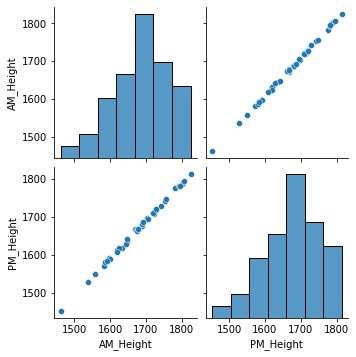

In [7]:
sns.pairplot(heights)

#Linear is the correct answer!!! 

# Testing for Homoscedasticity

In [8]:
x = heights['AM_Height']
y = heights['PM_Height']

In [9]:
model = sm.OLS(y,x).fit()

In [10]:
pred_val = model.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

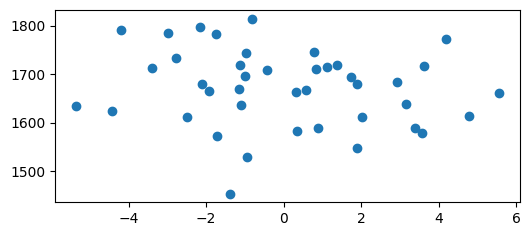

In [11]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

#Um.. this is not a straight line so I think we are going against Homoscedasticity 

## running the BP test

In [12]:
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(17.281807808596078, nan, 29.14523614469984, 3.300037241076595e-06)

#Number are significant so we have gone against Homoscedasticity

In [13]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713)

#P-value is not significant here

In [17]:
newhieghts, _= boxcox(heights['AM_Height'])

(array([1., 1., 4., 6., 4., 9., 7., 3., 3., 3.]),
 array([5.21052681e+11, 5.92351778e+11, 6.63650875e+11, 7.34949971e+11,
        8.06249068e+11, 8.77548165e+11, 9.48847262e+11, 1.02014636e+12,
        1.09144546e+12, 1.16274455e+12, 1.23404365e+12]),
 <BarContainer object of 10 artists>)

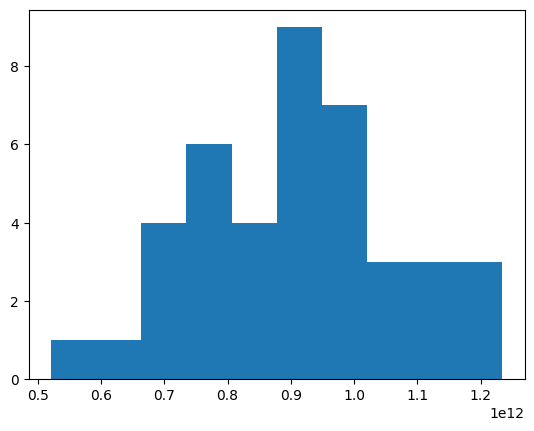

In [18]:
plt.hist(newhieghts)

In [19]:
x = newhieghts
model1 = sm.OLS(y,x).fit()

In [20]:
pred_val = model1.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

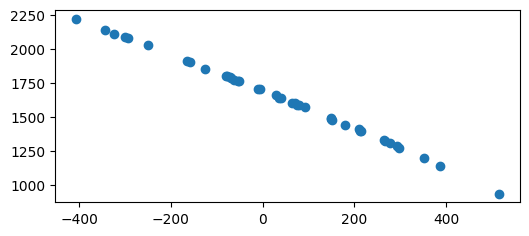

In [21]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

#Looks better linear 

In [22]:
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(16.08941979885967, nan, 25.83547981451374, 9.088971505485298e-06)

#Looks like theres no significance 

In [23]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713)

#No signifance 

# Testing for outliers 

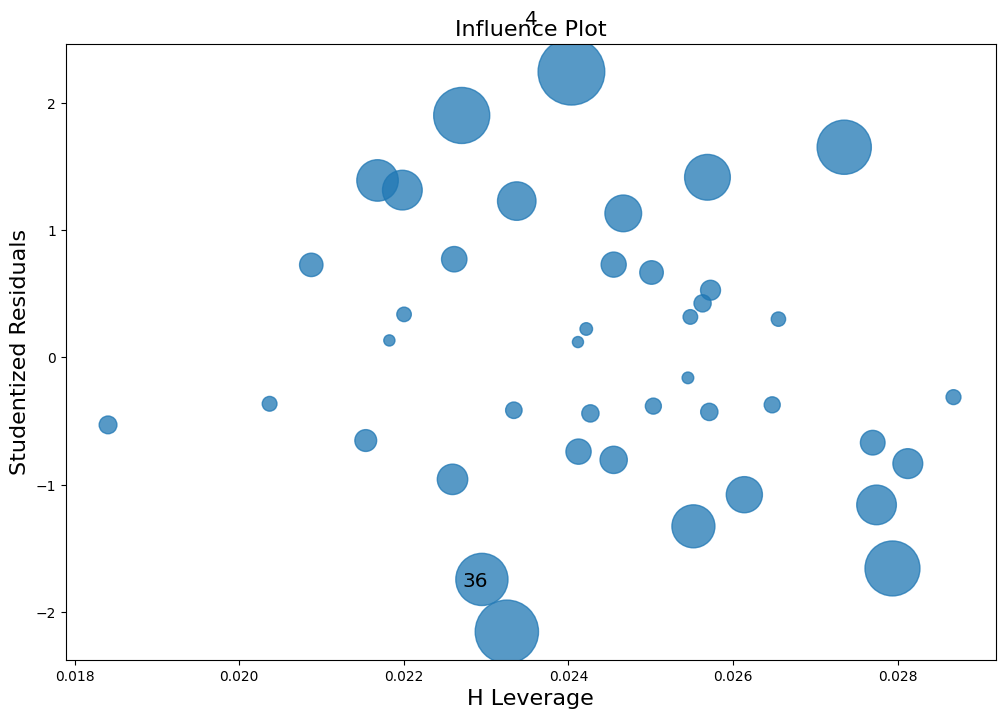

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

#36 is the outlier 

In [25]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_AM_Height   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        0.085810  0.007499        0.532882  0.025727         0.086594   
1       -0.052524  0.002820       -0.368264  0.020370        -0.053103   
2       -0.072577  0.005364       -0.534832  0.018407        -0.073238   
3        0.276961  0.073531        1.617035  0.027352         0.271167   
4        0.352303  0.112733        2.139438  0.024037         0.335757   
5       -0.096874  0.009521       -0.657675  0.021538        -0.097576   
6        0.018976  0.000369        0.122229  0.024116         0.019215   
7       -0.214747  0.045255       -1.314577  0.025519        -0.212733   
8       -0.064154  0.004203       -0.419385  0.023338        -0.064829   
9       -0.113058  0.012961       -0.674508  0.027698        -0.113845   
10      -0.053609  0.002940       -0.315564  0.028680        -0.054224   
11      -0.281081  0.075697       -1.622878  0.027938        -0.275131   
12      -0.176694  0.031094       -1.0

## taking out row 36 

In [26]:
heights.drop(heights.index[36], inplace=True)

In [27]:
x = heights['AM_Height']
y = heights['PM_Height']

In [28]:
modelNo2 = sm.OLS(y,x).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.665e+07
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                   5.17e-114
Time:                        21:07:54   Log-Likelihood:                         -97.263
No. Observations:                  41   AIC:                                      196.5
Df Residuals:                      40   BIC:                                      198.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9943      0.000   4079.964      0.000       0.994       0.995
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.817
Skew:                           0.133   Prob(JB):                        0.665
Kurtosis:                       2.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Looks like the same models so we can use the orginal data 

# The end :-)